# Insurence Premium Prediction

##### Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health 
insurance carrier and its plans and perks while keeping the projected cost from our 
study in mind. This can assist a person in concentrating on the health side of an 
insurance policy rather han the ineffective part.

## Data Description
### There are 6 independent variables:

1. Age : Age of  person
2. Sex : sex of person (male/female)
3. bmi :  BMI of person
4. Children : How much childrens have
5. Smoker : Person is a smoker or not
6. Region : Person belong to which region(southwest or northwest)


### Target veriable:
#### Expense : How much expense 


Dataset link: https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

#### The goal of this notebook is to conduct a comperhensive exploratory data analysis (EDA) on the dataset.

### import Important libraries

In [2]:
#import Important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

#### Data ingestion

In [3]:
dataset = pd.read_csv('data\insurance.csv')

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Basic Data Exploration

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#Checking any null value present in the datset or not
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
dataset.shape

(1338, 7)

In [14]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### Observation: There are no missing values in the dataset. 

In [16]:
# Cheking any duplicate values present in the dataset or not

dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [22]:
# Remove the dupicate values from the dataset
dataset.drop_duplicates(inplace=True)

In [23]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses


#### All duplicate values are removed

In [24]:
#Seperate the numerical and categorical values
numerical_columns=dataset.columns[dataset.dtypes!='object']
categorical_columns=dataset.columns[dataset.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [25]:
dataset[numerical_columns].describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


#### Observation: It seems like most of the independent features have mean and median pretty close to each other.

In [26]:
dataset[categorical_columns].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [30]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Exploration of numerical features

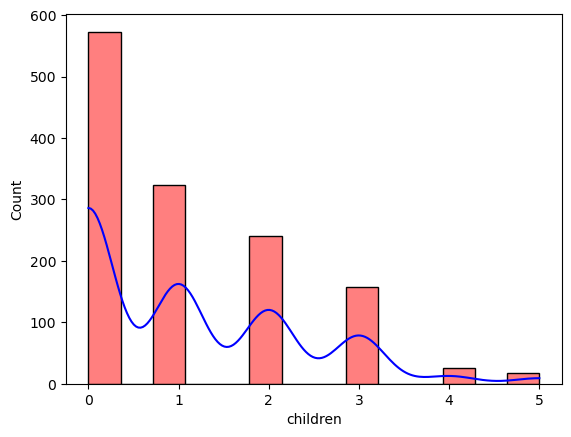

In [46]:
ax=sns.histplot(data=dataset['children'],kde=True,color='r')
ax.lines[0].set_color('blue')

In [49]:
features = [col for col in numerical_columns]
features.remove("expenses")
features

['age', 'bmi', 'children']

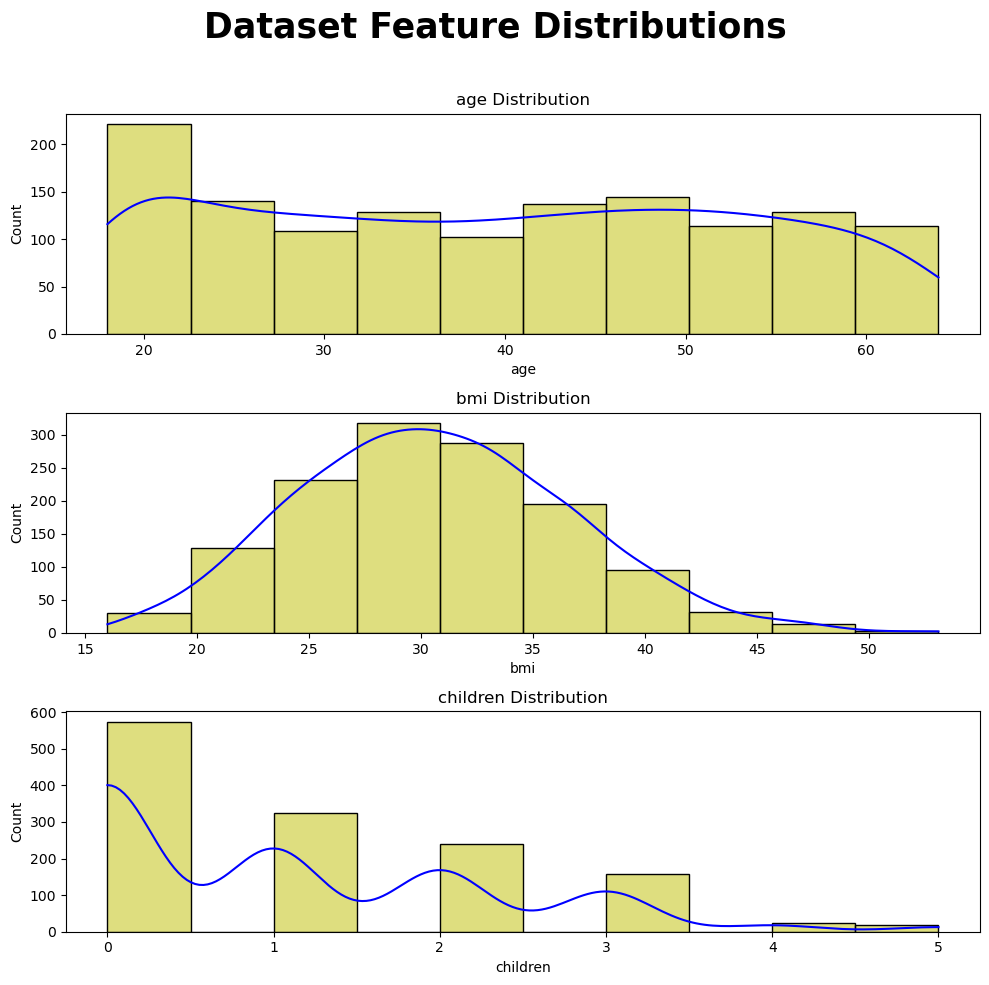

In [63]:
#visuallizing the all numerical features

n_cols = 1
n_rows = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 10))
ax = ax.flatten()
    
for i, column in enumerate(features):
    plot_axes = [ax[i]]
    #sns.kdeplot(dataset[column], ax = ax[i], color='Red')
    plot=sns.histplot(dataset[column], kde = True, bins = 10, ax = ax[i],color='y')
    plot.lines[0].set_color('blue')
    
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
    

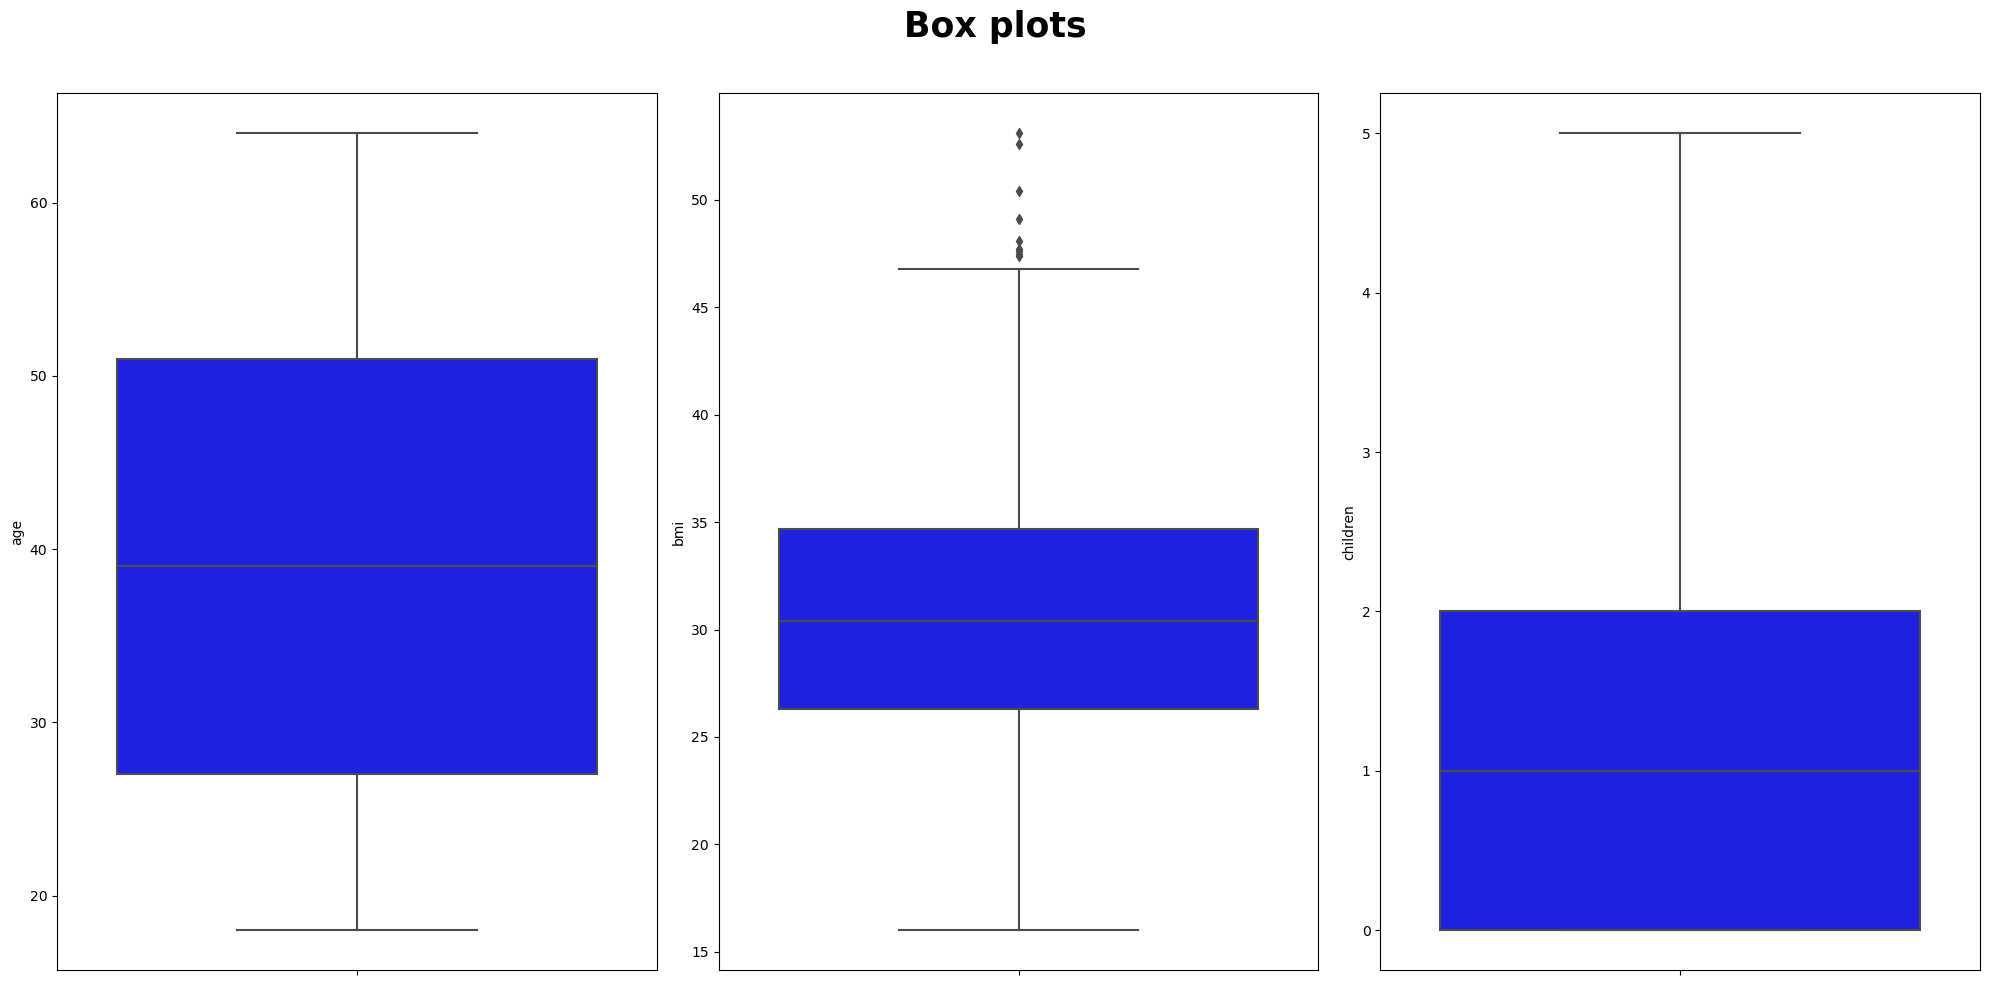

In [70]:
# Checking outliers using box plot

# create box plots
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in features:
    sns.boxplot(y=col, data=dataset, ax=ax[index], color='b')
    plt.subplots_adjust(wspace = .5)
    index += 1
    
fig.suptitle(f'Box plots\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()


#### Obeservation: Some outliers present in bmi column 

## Exploring catagorical values

In [73]:
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [74]:
dataset[categorical_columns].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [75]:
cat_features = [col for col in categorical_columns]
cat_features

['sex', 'smoker', 'region']

In [79]:
def plot_count_chart(col:str):
    fig = plt.figure(figsize=(10, 5), dpi=120)
    s = sns.countplot(data = dataset, x = col, order = dataset[col].value_counts().index)
    fig.suptitle(col, ha="center",  fontweight="bold", fontsize=14)
    for container in s.containers:
        s.bar_label(container, c='black', size=12);
        s.set_ylabel(''); s.spines['top'].set_visible(False),
        s.set_xlabel(''); s.spines['right'].set_visible(False),
        s.spines['left'].set_visible(False)
        plt.tick_params(labelleft=False)

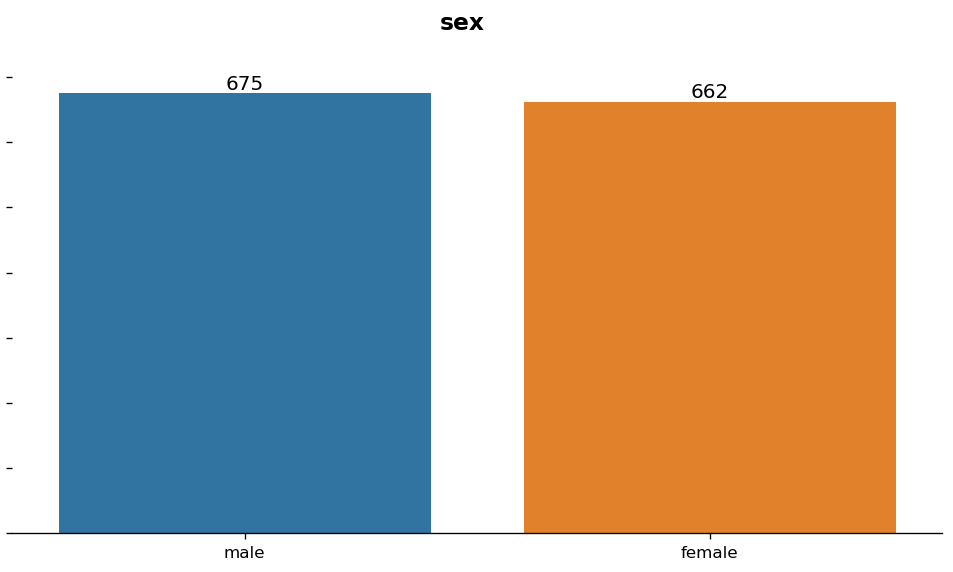

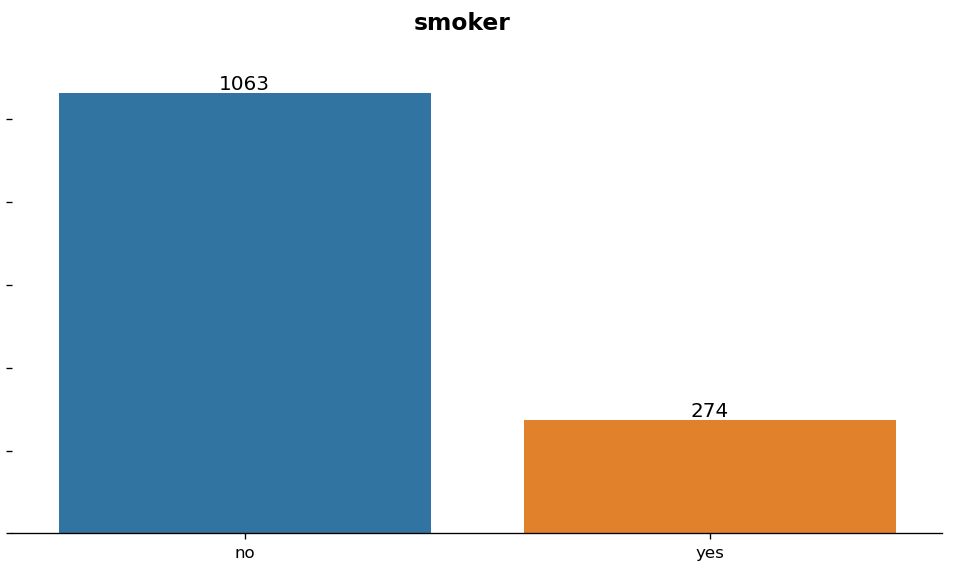

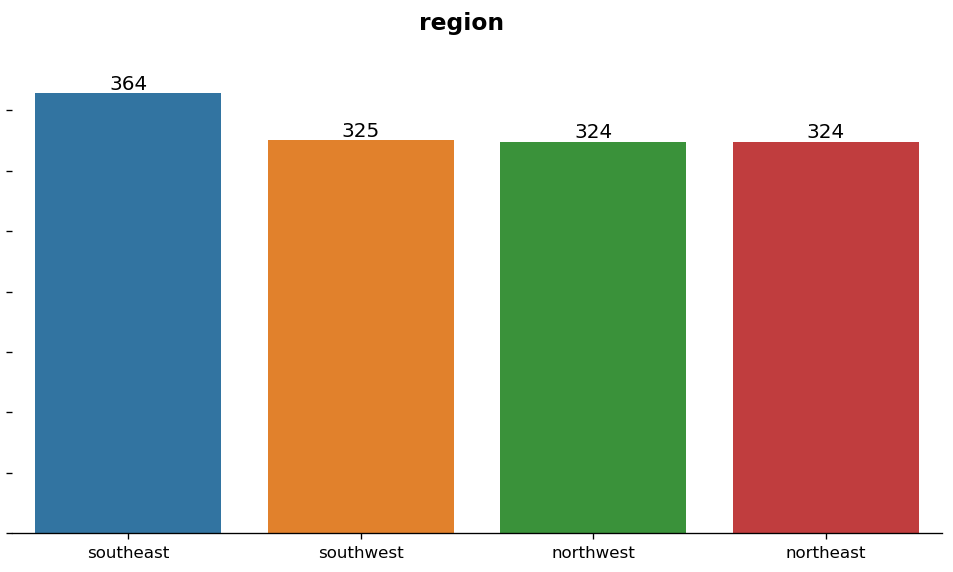

In [80]:
for col in cat_features:
    plot_count_chart(col)

#### Obeservation:
1. male female ratio is vary closer 
2. most of the person is non smeker
3. region wise nortwest and southwest ratio is near to same 

### Target Variable vs Independent Numerical Variables

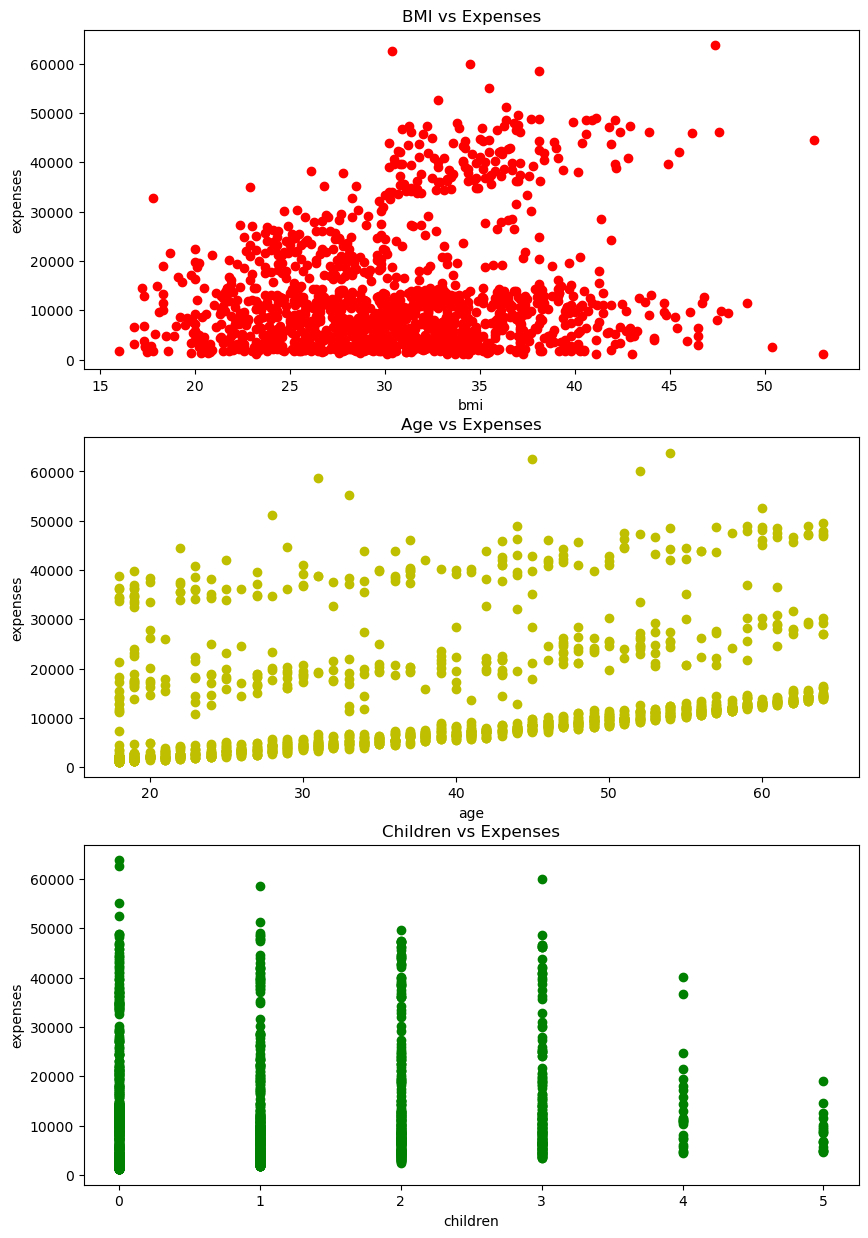

In [114]:
plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
plt.scatter(x=dataset['bmi'],y=dataset['expenses'],c='r')
plt.title("BMI vs Expenses")
plt.xlabel("bmi")
plt.ylabel('expenses')

plt.subplot(3,1,2)
plt.scatter(x=dataset['age'],y=dataset['expenses'],c='y')
plt.title("Age vs Expenses")
plt.xlabel("age")
plt.ylabel('expenses')

plt.subplot(3,1,3)
plt.scatter(x=dataset['children'],y=dataset['expenses'],c='g')
plt.title("Children vs Expenses")
plt.xlabel("children")
plt.ylabel('expenses')



plt.show()

### Target Variable vs Independent Categorical Variables

In [115]:
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

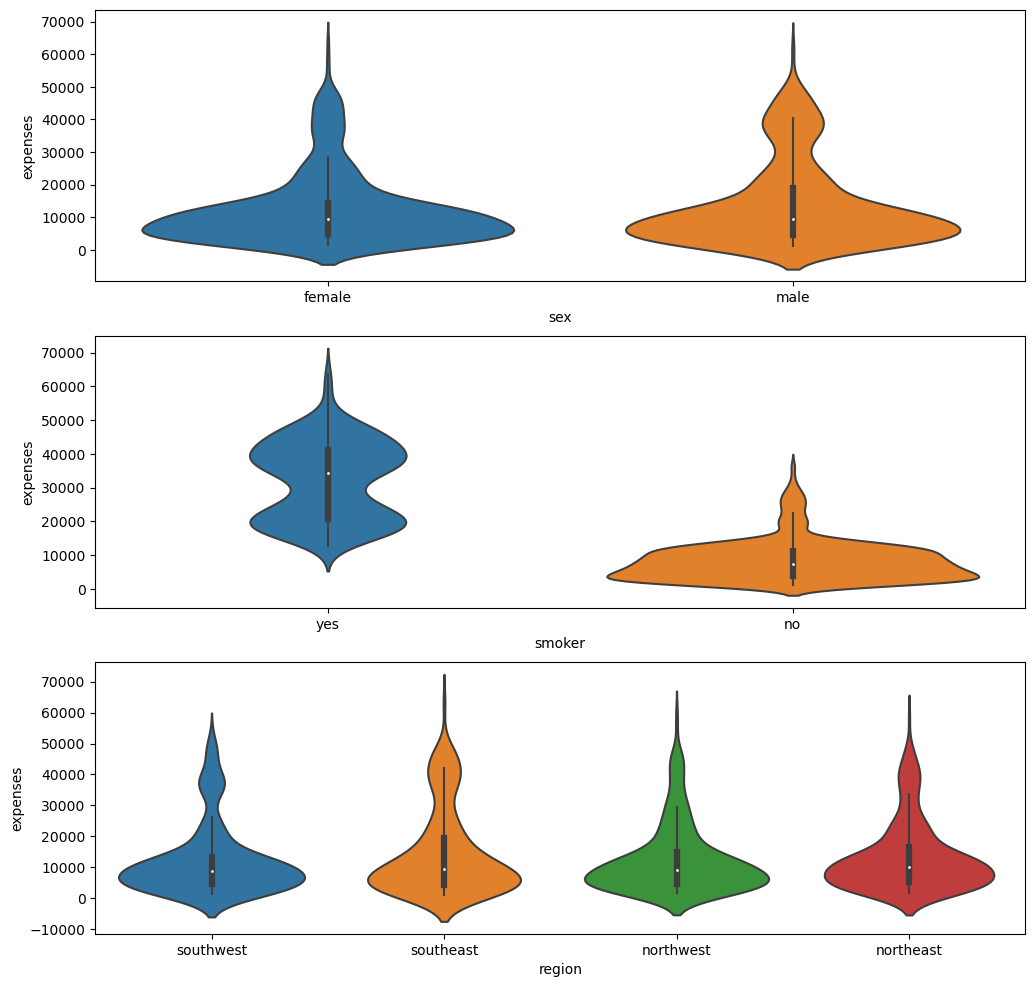

In [116]:
target = dataset['expenses']
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(12,12))
for row in range(rows):
    sns.violinplot(x = categorical_columns[index], y = target, data =dataset,  ax=axs[row])
    index += 1

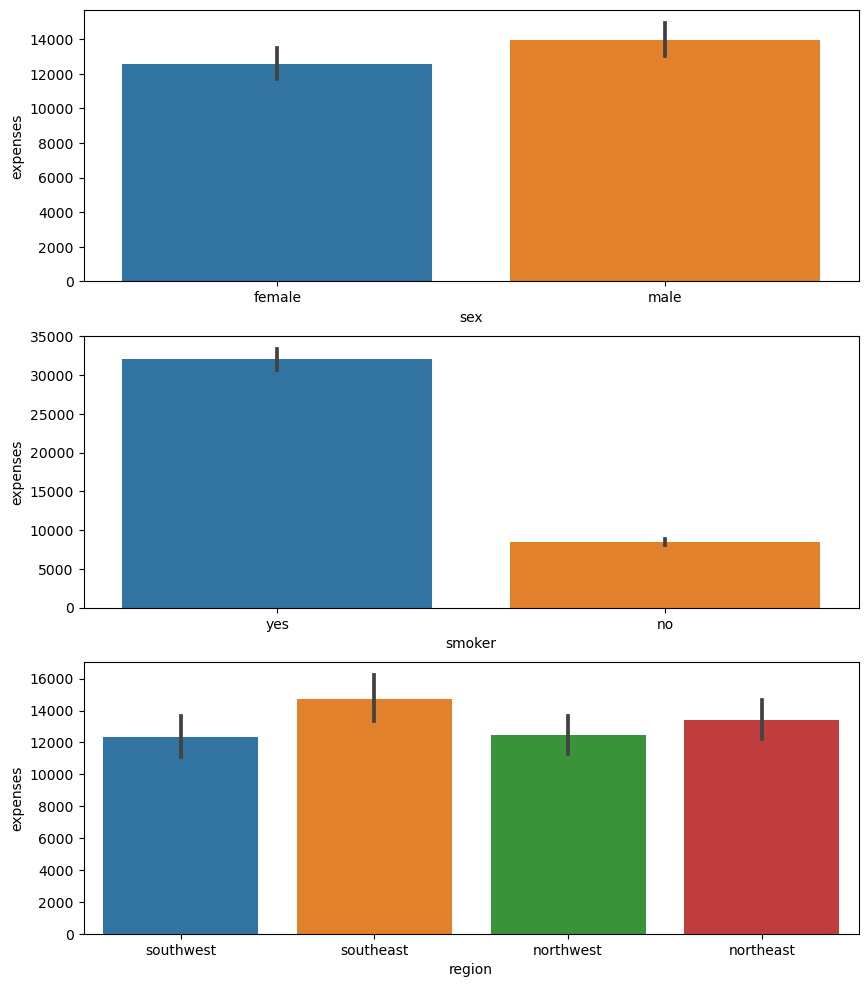

In [120]:
target = dataset['expenses']
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(10,12))
for row in range(rows):
    sns.barplot(x = categorical_columns[index], y = target, data =dataset,  ax=axs[row])
    index += 1


### Correlation


In [133]:
corr = dataset[numerical_columns].corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


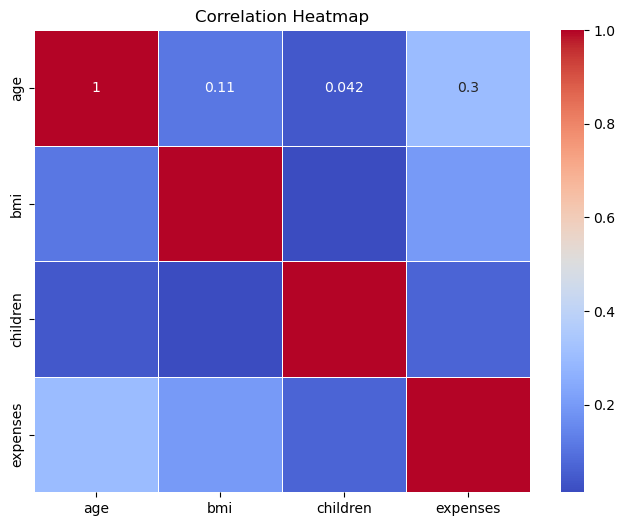

In [134]:

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5,xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Heatmap')
plt.show()